# BI Analysis Exploratory Data Analysis

Shawna Tuli (shawna.tuli@avanade.com)

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read data

In [2]:
df = pd.read_csv('dataset_2.csv')
df.head(10)

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100%,3,4.8
1,Abraham,12,83%,5,4.7
2,Adelina,1,100%,2,4.7
3,Akilah,1,100%,2,4.9
4,Alec,21,76%,11,5.0
5,Alesha,7,100%,4,4.8
6,Alvaro,17,88%,11,4.6
7,Andra,16,94%,11,4.6
8,Augusta,19,84%,11,4.7
9,Aurora,10,90%,4,4.6


Examine info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             119 non-null    object 
 1   Trips Completed  119 non-null    int64  
 2   Accept Rate      119 non-null    object 
 3   Supply Hours     119 non-null    int64  
 4   Rating           119 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ KB


Convert accept rate to float from string to force conditions later

In [4]:
df['Accept Rate'] = df['Accept Rate'].apply(lambda x: float(x[:-1]))
df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
0,Abdul,1,100.0,3,4.8
1,Abraham,12,83.0,5,4.7
2,Adelina,1,100.0,2,4.7
3,Akilah,1,100.0,2,4.9
4,Alec,21,76.0,11,5.0


Make plot_counts function

In [11]:
def plot_counts(ax):

    for c in ax.containers:

        # Optional: if the segment is small or 0, customize the labels
        labels = [v.get_height() if v.get_height() > 0 else '' for v in c]

        # Remove the labels parameter if it's not needed for customized labels
        ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
    plt.ylabel("Count")
    plt.show() 

Define figure size

In [12]:
plt.rcParams["figure.figsize"] = (12,6)

Plot bar chart

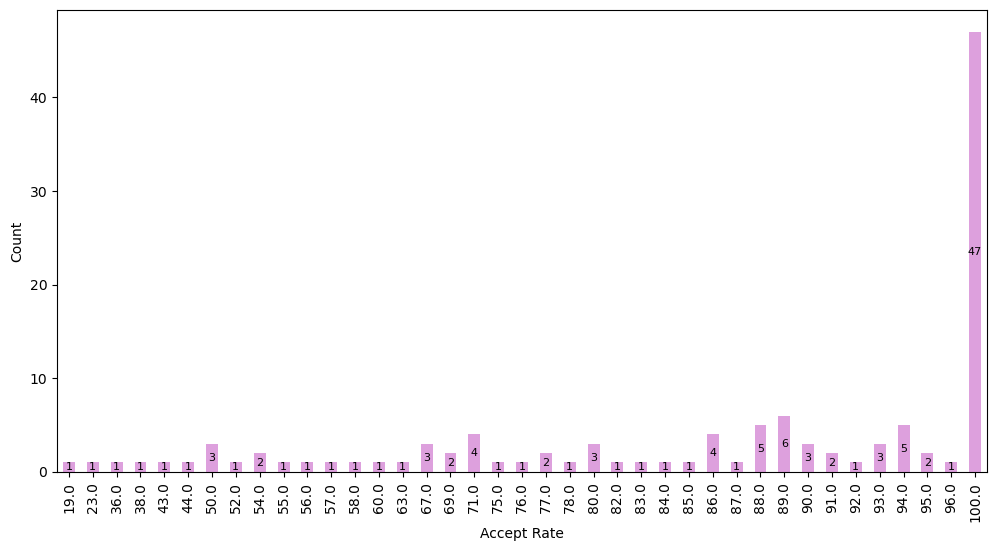

In [16]:
ax = df.groupby("Accept Rate")["Name"].count().reset_index().plot(
    kind='bar', stacked=False, x='Accept Rate', color='plum', legend=False)
plot_counts(ax)

Map ratings graph

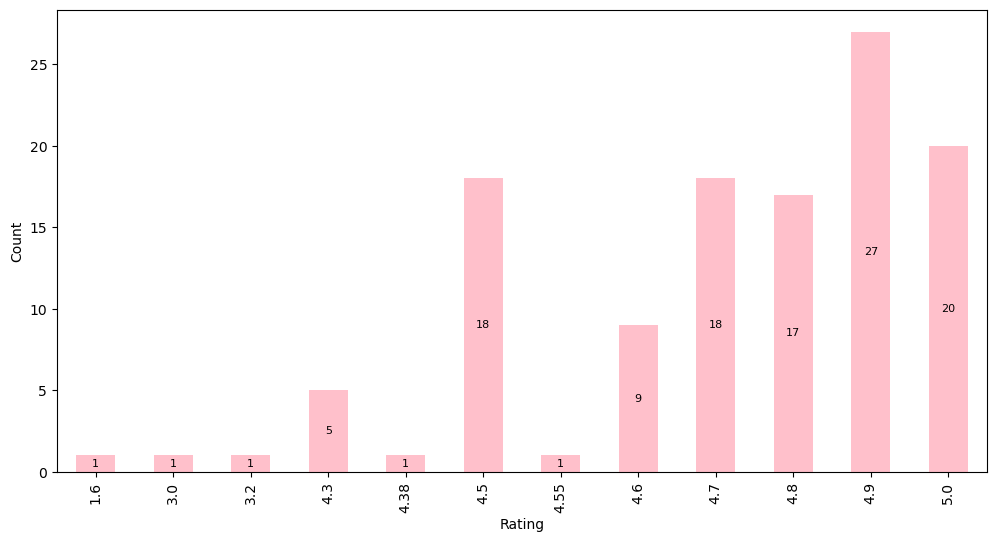

In [17]:
ax = df.groupby("Rating")["Name"].count().reset_index().plot(
    kind='bar', stacked=False, x='Rating', color='pink',legend=False)
plot_counts(ax)

Create Trips Completed column graph

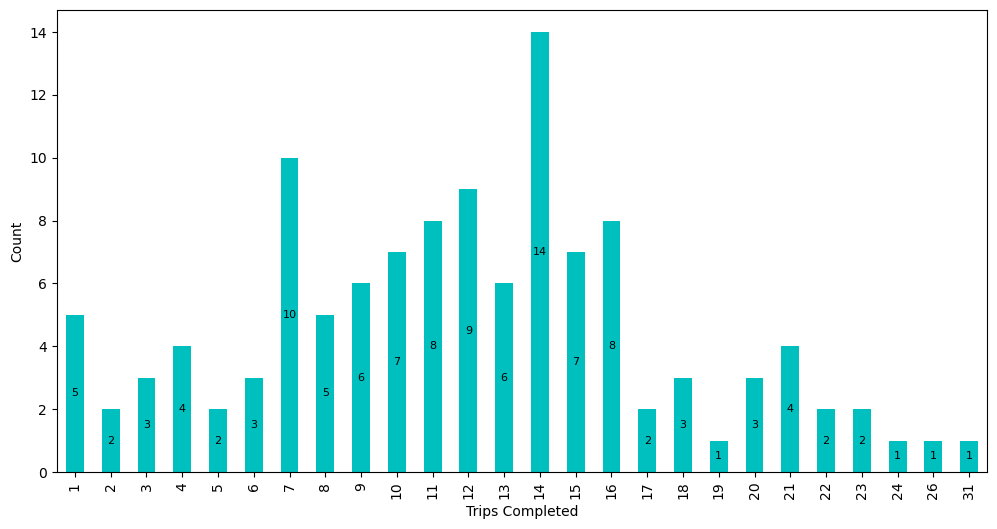

In [18]:
ax = df.groupby("Trips Completed")["Name"].count().reset_index().plot(
    kind='bar', stacked=False, x='Trips Completed', color='c', legend=False)
plot_counts(ax)

Graph the drivers' working hours

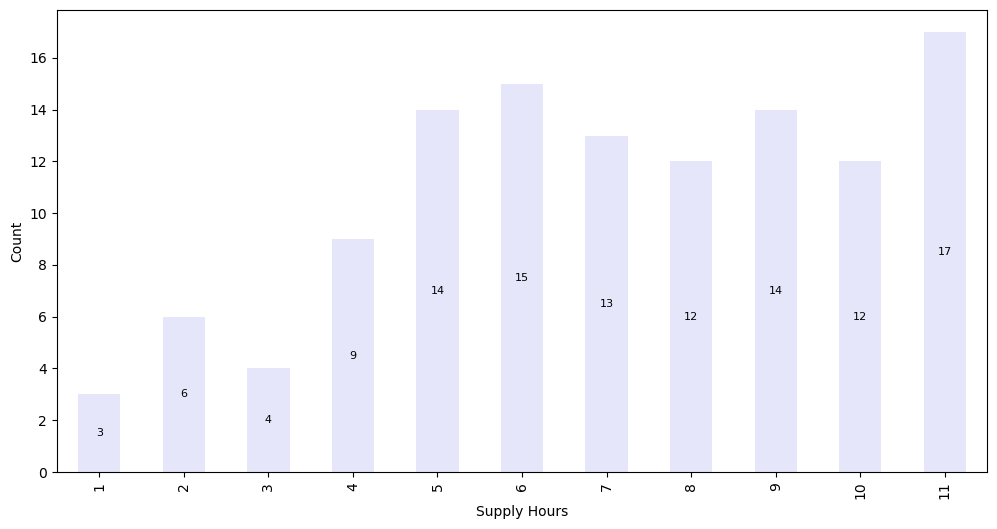

In [21]:
ax = df.groupby("Supply Hours")["Name"].count().reset_index().plot(
    kind='bar', stacked=False, x='Supply Hours', color='lavender',legend=False)
plot_counts(ax)

## Scenario 1

It is going to be a huge Saturday and there will need to be many more cars on the road than last week. In order to get drivers to go online, we're assessing the following two bonus options in terms of cost:

* Option 1: $50 for each driver that is online at least 8 hours, accepts 90% of requests, completes 10 trips, and has a rating of 4.7 or better during the time frame;

* Option 2: $4/trip for all drivers who complete 12 trips, and have a 4.7 or better rating.

#### Q1. How much would the total bonus payout be with Option 1?

To identify drivers who are eligible for the $50 bonus according to the first option, we need to apply the following four conditions:

* Online for 8 hours or more
* Accept rate equal to or higher than 90%
* Should complete 10 or more trips
* Maintain a rating of 4.7 or more

In [20]:
# Filter by given condition
first_option_df = df[(df['Supply Hours'] >= 8) & (df['Trips Completed'] >= 10) & 
                     (df['Accept Rate'] >= 90) & (df['Rating'] >= 4.7)]
first_option_df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
11,Byron,15,100.0,10,4.9
12,Carlota,14,100.0,8,5.0
19,Dannette,14,100.0,9,4.9
23,Demetrius,14,100.0,9,5.0
26,Dimple,15,100.0,10,4.9


To calculate the total cost, we need to multiply the number of eligible drivers in the first_option_df DataFrame by $50 and then print the result. 

In [23]:
first_option_total_payout = 50 * len(first_option_df)
print('$'+str(first_option_total_payout))

$1050


First, add a dollar sign to the beginning of the output and filter the df DataFrame based on the conditions that we already mentioned.

Then, determine the number of drivers who meet the conditions using the shape attribute, multiply this number by $50, and return the result as a string using multiple str methods.

In [24]:
str("$") + str(df[(df["Supply Hours"] >= 8) & (df["Accept Rate"] >= 90) & (df["Trips Completed"] >= 10) & (df["Rating"] >= 4.7)].shape[0]*50)

'$1050'

#### Q2. How much would the total bonus payout be with Option 2?

The code that we need should filter the DataFrame based on the given conditions:

* Complete more than 12 trips
* Maintain a 4.7 or more rating

Then we will assign the resulting DataFrame to second_option_df, which is displayed using the head() function to show the first few rows.

Again, we will use boolean indexing to filter our DataFrame.

In [27]:
# Filter by given condition
second_option_df = df[(df['Trips Completed'] >= 12) & (df['Rating'] >= 4.7)]
second_option_df.head()

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
1,Abraham,12,83.0,5,4.7
4,Alec,21,76.0,11,5.0
8,Augusta,19,84.0,11,4.7
10,Buffy,13,54.0,6,5.0
11,Byron,15,100.0,10,4.9


We need to calculate the total payout for the second option by adding the fare earned by completing 12 or more trips. This is calculated by summing the completed trips and multiplying it by 4, then adding a dollar sign at the beginning of the result by converting the result to a string with the str() function.

In [28]:
second_option_total_payout = 4 * second_option_df['Trips Completed'].sum()
print('$'+str(second_option_total_payout))

$2976


The shorter way would be to add a dollar sign at the beginning of our code, then use the boolean indexing.

After that, use the sum() method to calculate the total and then multiply it by 4 to calculate how much the second option would cost.

In [29]:
str("$") + str(df[(df["Trips Completed"] >= 12) & (df["Rating"] >= 4.7)]["Trips Completed"].sum() * 4)

'$2976'

#### Q3. How many drivers would qualify for a bonus under Option 1 but not under Option 2?

Our code will merge the two DataFrames used for Option 1 and Option 2 and add an argument to find drivers who qualify for a bonus under Option 1 but not Option 2. It will do that by adding an indicator column to the merged DataFrame.

In [30]:
# Merge all and see if both dataset includes the driver from _merge column
df_all = first_option_df.merge(second_option_df, on=first_option_df.columns.to_list(), 
                   how='left', indicator=True)
df_all

,Name,Trips Completed,Accept Rate,Supply Hours,Rating,_merge
0,Byron,15,100.0,10,4.9,both
1,Carlota,14,100.0,8,5.0,both
2,Dannette,14,100.0,9,4.9,both
3,Demetrius,14,100.0,9,5.0,both
4,Dimple,15,100.0,10,4.9,both
5,Emil,12,100.0,9,5.0,both
6,Garth,15,100.0,10,5.0,both
7,Hanh,14,94.0,9,4.9,both
8,Keshia,20,100.0,11,4.8,both
9,Latonia,13,100.0,9,5.0,both


The newly merged DataFrame includes a column named _merge to indicate the origin of the rows.

By filtering the rows with the left_only value in the _merge column, we can select the drivers who qualify for a bonus under Option 1 but not under Option 2.

In [31]:
# Included by only option 1
df_all[df_all["_merge"] == 'left_only']

,Name,Trips Completed,Accept Rate,Supply Hours,Rating,_merge
16,Oren,11,91.0,9,4.8,left_only
17,Phyllis,10,90.0,8,4.8,left_only


Here we will use the index.difference method.

This method helps us find the drivers who qualify for a bonus under Option 1 but not under Option 2.

So in the first part, we define Option 1 with boolean indexing. In the second part, we will define Option 2, again with boolean indexing.

Then we use the index.difference method to find the difference between Option 1 and Option 2, which will be an answer to our question.

In [32]:
len(df[(df["Supply Hours"] >= 8) & (df["Accept Rate"] >= 90) & (df["Trips Completed"] >= 10) & (df["Rating"] >= 4.7)].index.difference(df[(df["Trips Completed"] >= 12) & (df["Rating"] >= 4.7)].index))

2

#### Q4. What percentages of drivers online completed less than 10 trips, had an acceptance rate of less than 90%, and had a rating of 4.7 or higher?

We will filter the dataset based on the following conditions:

* Completed less than 10 trips
* Acceptance rate less than 90%
* Rating is 4.7 or higher

We will then store the resulting rows in the new DataFrame called less_trips_df.

We will solve this question in a similar way to the first, second, and third questions by filtering the dataset using multiple conditions.

In [34]:
# Filter with given condition
less_trips_df = df[(df['Trips Completed'] < 10) & (df['Accept Rate'] < 90) & (df['Rating'] >= 4.7)]
less_trips_df

,Name,Trips Completed,Accept Rate,Supply Hours,Rating
17,Cris,7,71.0,5,5.0
18,Dalila,7,57.0,2,4.8
20,Dannielle,3,67.0,5,5.0
22,Delfina,4,50.0,3,4.7
27,Domenica,9,89.0,5,4.9
36,Floyd,3,67.0,1,4.8
41,Hee,9,89.0,7,4.7
45,Ingrid,7,43.0,4,4.8
66,Lilla,9,89.0,8,4.7
67,Loree,9,89.0,8,4.7


Now we found the drivers, let’s find the percentage by dividing the number of drivers by the length of a DataFrame, then multiplying it by 100. After that, we will turn this result into a string and add “%” at the end of the result.

In [35]:
print(str(len(less_trips_df) / len(df) * 100)+"%")

10.92436974789916%


This approach filters the conditions, finds the length of the filtered condition, and divides it by the shape of the DataFrame to find the ratio. It then multiplies the ratio by 100 to calculate the percentage and adds the "%" sign at the end of the result.

In [36]:
str((df[(df["Trips Completed"] < 10) & (df["Accept Rate"] < 90) & (df["Rating"] >= 4.7)].shape[0]/ df.shape[0])*100) + str("%")

'10.92436974789916%'

## Scenario 2

A taxi driver currently generates $200 per day in fares (before expenses), works six days a week, takes three weeks off, and has the following expenses:

* Gas: 200 USD per week
* Insurance: 400 USD per month
* Vehicle rent (by the week): 500 USD
    
The driver doesn't pay gas and rent expenses on the off weeks.

#### Q5. How much money (after expenses) does the taxi driver make per year without partnering with Uber?

The task is to compute the annual net income of taxi drivers given four conditions, one of which states that they will have three weeks of leave annually.

We will define the variables, including total weeks (52), total_months_per_year (12), weeks_off (3), fare_per_day ($200), and workday_per_week (6), which will be used in the calculations.

We will also define the expenses for each week, including $200 for gas (gas_per_week), $400 for insurance per month (insurance_per_month), and $500 for vehicle rent per week (vehicle_rent_by_week).

Finally, we will compute the net earnings per year using the defined variables and expenses.

In [39]:
total_weeks_per_year = 52
weeks_off = 3
fare_per_day = 200 
workday_per_week = 6
total_months_per_year = 12
# expenses
gas_per_week = 200
insurance_per_month = 400
vehicle_rent_by_week = 500

The calculation will be done in three steps, starting with the total expenses for gas, rent, and insurance. Gas and rent are weekly expenses, while insurance is a monthly expense.

In [40]:
total_expenses = (gas_per_week + vehicle_rent_by_week) * (total_weeks_per_year - weeks_off) + insurance_per_month * total_months_per_year
print("$"+str(total_expenses))

$39100


Next, we will determine the total revenue by multiplying the fare per day by the number of workdays per week and the number of working weeks per year (52 minus the number of weeks off).

In [41]:
total_revenue = (total_weeks_per_year - weeks_off) * workday_per_week * fare_per_day
print("$"+str(total_revenue))

$58800


The final step involves subtracting the total expenses from the total revenue to obtain the net earnings of the driver.

In [42]:
profit_margin = total_revenue - total_expenses
print("$"+str(profit_margin))

$19700


In this approach, we will calculate the net earnings per year for a taxi driver by directly performing the calculations for expenses and revenue and then converting the numerical result to a string with a dollar sign.

In [43]:
str("$") + str((49 * (-500 - 200 + 1200)) - (12 * 400))

'$19700'

#### Q6. You are convincing the same driver above to buy a Town Car and partner with Uber. Assuming the new car is $40,000, how much would the driver's gross fares need to increase per week to fully pay for the car in year 1 and maintain the same yearly profit margin as before?

We will perform similar calculations, but with some modifications.

Firstly, we will raise the gas price by 5% (multiplying it by 1.05) and decrease the insurance cost by 20% (multiplying the previous insurance cost by 0.8).

In addition, we will add a new expense, the cost of a car, which is $40,000, since we assume that the driver will buy a car instead of renting it.

Now, let's calculate the net earnings with these adjustments.

In [44]:
# Calculate new expenses
gas_per_week = gas_per_week * 1.05
insurance_per_month = insurance_per_month * 0.8
new_car = 40000

new_total_expenses = new_car + gas_per_week * (total_weeks_per_year - weeks_off) + insurance_per_month * total_months_per_year
new_profit_margin = total_revenue - new_total_expenses
print("$"+str(new_profit_margin))

$4670.0


Let’s calculate the new profit for our driver.

In [45]:
new_profit_margin = total_revenue - new_total_expenses
print("$"+str(new_profit_margin))

$4670.0


The next step is to calculate the weekly fare increase required to maintain the same yearly profit margin as before after the adjustments made to the expenses.

In [46]:
# Calculate the weekly fare increase
fare_increase = (profit_margin - new_profit_margin) / (total_weeks_per_year - weeks_off)
print("$"+str(round(fare_increase, 2)))

$306.73


To be able to purchase a car with increased weekly earnings, the driver needs to raise their fare by 306.73 per week.

As with the previous question, we will perform the calculations without adding variables and first compute the annual profit margin.

In [49]:
49 * (-500 - 200 + 1200) - (12 * 400)

19700

Next, we'll compute the new profit margin, which will be the profit margin after the driver buys a car.

In [51]:
((49 * 1200) - (200 * 1.05 * 49) - (400 * 0.8 *12) - (40000))

4670.0

Then, we will calculate the difference and divide it by 49, then round the outcome to 2 decimals.

Lastly, we add a dollar sign at the beginning of the result and convert it into a string.

In [52]:
str("$") + str(round(((49 * (-500 - 200 + 1200)) - (12 * 400) - ((49 * 1200) - (200 * 1.05 * 49) - (400 * 0.8 *12) - (40000))) / (49),2))

'$306.73'

End